In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

In [17]:
import matplotlib.pyplot as plt


from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
train = pd.read_csv('./output/giros_train_numeric.csv', index_col=0)
train.head()

,Weekday of Fecha Referencia,Day of Fecha Referencia,Month of Fecha Referencia,Giros
id,,,,
1,1,1,1,1115
2,1,1,2,5934
3,1,1,4,13417
4,1,1,5,2827
5,1,1,6,12283


In [19]:
test = pd.read_csv('./output/giros_test_numeric.csv', index_col=0)
test.head()

,Weekday of Fecha Referencia,Day of Fecha Referencia,Month of Fecha Referencia
id,,,
1,1,1,2
2,1,1,3
3,1,1,6
4,1,1,8
5,1,1,11


In [3]:
X = train.drop(columns=["Giros"])
y = train["Giros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
models = {
    "forest200": RandomForestRegressor(n_estimators=200),
    "forest400": RandomForestRegressor(n_estimators=400),
    "ada700": AdaBoostRegressor(n_estimators=700),
    "ada900": AdaBoostRegressor(n_estimators=900),
    "boosting_950": GradientBoostingRegressor(n_estimators=950),
    "boosting_1050": GradientBoostingRegressor(n_estimators=1050),
    "extra_100":ExtraTreesRegressor(),
    "extra_300":ExtraTreesRegressor(n_estimators=300),
    "extra_700":ExtraTreesRegressor(n_estimators=700)
}

In [5]:
for name, model  in models.items():
    print(f"Starting training")
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Training complete")

Starting training
Training forest200...
Training complete
Starting training
Training forest400...
Training complete
Starting training
Training ada700...
Training complete
Starting training
Training ada900...
Training complete
Starting training
Training boosting_950...
Training complete
Starting training
Training boosting_1050...
Training complete
Starting training
Training extra_100...
Training complete
Starting training
Training extra_300...
Training complete
Starting training
Training extra_700...
Training complete


In [6]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,4)}")

for name,m in models.items():
    y_pred = m.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("RMSE",math.sqrt(mean_squared_error(y_test, y_pred)))

Evaluating model forest200
	 RMSE: 3181.7209
Evaluating model forest400
	 RMSE: 3190.6886
Evaluating model ada700
	 RMSE: 2601.557
Evaluating model ada900
	 RMSE: 2613.3984
Evaluating model boosting_950
	 RMSE: 2919.8147
Evaluating model boosting_1050
	 RMSE: 2939.2043
Evaluating model extra_100
	 RMSE: 3306.202
Evaluating model extra_300
	 RMSE: 3318.5697
Evaluating model extra_700
	 RMSE: 3308.8169


# Without regulating size 

In [11]:
X = train.drop(columns=["Giros"])
y = train["Giros"]

In [12]:
models = {
    "forest200": RandomForestRegressor(n_estimators=200),
    "forest400": RandomForestRegressor(n_estimators=400),
    "ada700": AdaBoostRegressor(n_estimators=700),
    "ada900": AdaBoostRegressor(n_estimators=900),
    "boosting_950": GradientBoostingRegressor(n_estimators=950),
    "boosting_1050": GradientBoostingRegressor(n_estimators=1050),
    "extra_100": ExtraTreesRegressor(),
    "extra_300": ExtraTreesRegressor(n_estimators=300)
}

In [13]:
for name, model  in models.items():
    print(f"Starting training")
    print(f"Training {name}...")
    model.fit(X, y)
    print(f"Training complete")

Starting training
Training forest200...
Training complete
Starting training
Training forest400...
Training complete
Starting training
Training ada700...
Training complete
Starting training
Training ada900...
Training complete
Starting training
Training boosting_950...
Training complete
Starting training
Training boosting_1050...
Training complete
Starting training
Training extra_100...
Training complete
Starting training
Training extra_300...
Training complete


In [14]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,4)}")

for name,m in models.items():
    y_pred = m.predict(X)
    print(f"Evaluating model {name}")
    printMetric("RMSE",math.sqrt(mean_squared_error(y, y_pred)))

Evaluating model forest200
	 RMSE: 1176.5689
Evaluating model forest400
	 RMSE: 1174.1486
Evaluating model ada700
	 RMSE: 2454.3083
Evaluating model ada900
	 RMSE: 2446.2824
Evaluating model boosting_950
	 RMSE: 2209.5568
Evaluating model boosting_1050
	 RMSE: 2204.3213
Evaluating model extra_100
	 RMSE: 0.0
Evaluating model extra_300
	 RMSE: 0.0


# REAL Preds (Tac Ops)

In [9]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn import linear_model

In [13]:
forest200_model = linear_model.LinearRegression()

In [19]:
fitted_model = linear_model.fit(X_train, y_train)
print("intercept", fitted_model.intercept_) 
print("coefficients", fitted_model.coef_)

AttributeError: module 'sklearn.linear_model' has no attribute 'fit'

In [ ]:
x = fitted_model.predict(X_test)

In [ ]:
import pandas as pd 

predictionAuto_df = pd.DataFrame({'prediction': x,
                                'ground_truth': y_test,
                             'diff': x-y_test })

predictionAuto_df.head()

# Predictions

In [16]:
X = train.drop(columns=["Giros"])
y = train["Giros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
model = ExtraTreesRegressor(n_estimators=400)
fitted_model = model.fit(X, y)

In [20]:
y_pred_final = fitted_model.predict(test)
y_pred_final

array([ 5934.    , 11116.465 , 12283.    , ...,  5524.    ,  2172.    ,
        2121.2125])

In [23]:
pred = pd.DataFrame(y_pred_final).reset_index()
pred = pred.rename(columns={"index": "id", 0: "giros"})
pred.head()

,id,giros
0,0,5934.000
1,1,11116.465
2,2,12283.000
3,3,6691.000
4,4,7109.240


In [24]:
pred.shape

(1071, 2)

In [ ]:
# pred.to_csv('./output/pred3.csv', header=True, index=False)

In [25]:
x_predict = fitted_model.predict(X_test)

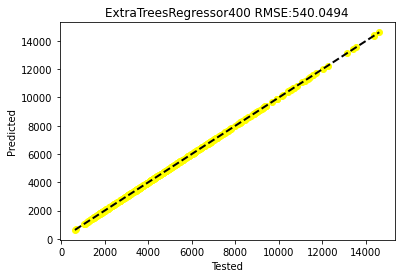

In [26]:
plt.scatter(x_predict, y_test, c="yellow")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,)
plt.xlabel('Tested')
plt.ylabel('Predicted')
plt.title("ExtraTreesRegressor400 RMSE:540.0494" )
plt.show()